## Notebook for exporatory data analysis of Per Scholas Data

In [35]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
os.getcwd()

'/home/kt12/repos/keepint'

In [3]:
a = pd.read_csv('per_scholas_data.csv', skiprows=range(1,2))
b = pd.read_csv('per_scholas_data2.csv')
c = pd.read_csv('per_scholas_data3.csv', skiprows=range(1,2))

In [4]:
a.head()

,Record ID,Workflow Status,Cycle,Placed,Start Date,Retained (Months),First Post Training Wage,Current Wage,Wage Gain %,Alumni Status,Career Coach,Meeting & Outreach Name,Meeting/ Outreach Date,Meeting Type,Outreach Type,# of Outreaches,Total # of Two-Way Contacts
0,CON-38109,Graduated,2014-15-NY,1,5/2/2014,5.0,15.00,NaN,NaN,STEP Program,Diana,M&O-2238,4/26/2016,Call,Quarterly Meeting - Unemployed,1,1
1,CON-47061,Graduated,2015-07-NY,1,2/10/2016,12.0,9.75,11.25,15%,Initial Placement,Diana,M&O-2237,4/22/2016,Call,Quarterly Meeting - Employed,4,5
2,CON-49375,Graduated,2016-06-NY,1,6/8/2015,16.0,23.00,45.67,99%,Re-placement,Diana,M&O-2235,4/21/2016,Call,Quarterly Meeting - Employed,1,1
3,CON-43833,Graduated,2015-15-NY,1,8/4/2014,13.0,15.00,NaN,NaN,Initial Placement,Diana,M&O-2251,6/27/2016,Call,Quarterly Meeting - Unemployed,0,1
4,CON-26658,Graduated,2016-06-NY,1,3/25/2015,18.0,21.63,26.44,22%,Placement Captured,Diana,M&O-2240,4/27/2016,Call,Quarterly Meeting - Employed,2,3


In [5]:
b.head()

,Record ID,Event/Workshop Date,# of New Hire Workshops,Alumni Event/Workshop Name
0,CON-40152,10/12/2016,1,New Hire Workshop
1,CON-25958,10/12/2016,1,New Hire Workshop
2,CON-42453,10/12/2016,1,New Hire Workshop
3,CON-41234,10/12/2016,1,New Hire Workshop
4,CON-32094,10/12/2016,1,New Hire Workshop


In [6]:
c.head()

,Record ID,Cycle,Alumni Class: Cycle Name,Certification Name,Date of Test,Status
0,CON-7354,2013-14-NY,SEC-16-002,CompTIA Security+,9/30/2016,Passed
1,CON-51341,2014-13-NY,SEC-16-002,CompTIA Security+,NaN,Not Reported
2,CON-47819,2015-16-NY,SEC-16-002,CompTIA Security+,10/19/2016,No Show
3,CON-45524,2014-13-NY,SEC-16-002,CompTIA Security+,10/19/2016,No Show
4,CON-46295,2015-16-NY,SEC-16-002,CompTIA Security+,NaN,Not Reported


In [7]:
a.describe()

,Placed,Retained (Months),First Post Training Wage,Current Wage,# of Outreaches,Total # of Two-Way Contacts
count,247.000000,242.000000,242.000000,95.000000,247.000000,247.000000
mean,0.979757,10.326446,16.402149,20.670737,1.291498,1.587045
std,0.141116,5.681451,6.052509,8.354926,0.885778,2.925830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,13.000000,15.510000,1.000000,1.000000
50%,1.000000,11.000000,16.000000,20.000000,1.000000,1.000000
75%,1.000000,14.000000,20.000000,25.000000,1.000000,1.000000
max,1.000000,32.000000,38.000000,45.670000,5.000000,44.000000


In [8]:
b.describe()

,# of New Hire Workshops
count,50.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [9]:
c.describe()

,Record ID,Cycle,Alumni Class: Cycle Name,Certification Name,Date of Test,Status
count,106,106,106,106,84,106
unique,102,44,8,4,41,5
top,CON-23160,2016-06-NY,BC-16-002,CompTIA Network+,5/2/2016,Failed
freq,2,11,25,52,10,40


In [10]:
a.shape

(247, 17)

In [11]:
b.shape

(50, 4)

In [12]:
c.shape

(106, 6)

In [13]:
merged_df = a.merge(b,on='Record ID').merge(c,on='Record ID')

In [14]:
merged_df.head()

,Record ID,Workflow Status,Cycle_x,Placed,Start Date,Retained (Months),First Post Training Wage,Current Wage,Wage Gain %,Alumni Status,...,# of Outreaches,Total # of Two-Way Contacts,Event/Workshop Date,# of New Hire Workshops,Alumni Event/Workshop Name,Cycle_y,Alumni Class: Cycle Name,Certification Name,Date of Test,Status
0,CON-43833,Graduated,2015-15-NY,1,8/4/2014,13.0,15.00,NaN,NaN,Initial Placement,...,0,1,3/16/2016,1,New Hire Workshop,2011-18-NY,Net BC-16-001,CompTIA Network+,NaN,Not Reported
1,CON-32546,Graduated,2014-20-NY,1,1/26/2014,29.0,22.00,39.62,80%,Re-placement,...,4,5,3/16/2016,1,New Hire Workshop,2014-07-NY,SEC-16-003,CompTIA Security+,9/13/2016,Passed
2,CON-37086,Graduated,2016-07-NY,1,2/2/2015,15.0,35.00,38.46,10%,Re-placement,...,2,2,8/17/2016,1,New Hire Workshop,2015-13-NY,SEC-16-003,CompTIA Security+,8/16/2016,Passed
3,CON-37086,Graduated,2015-07-NY,1,3/7/2016,12.0,16.83,NaN,NaN,Initial Placement,...,1,1,8/17/2016,1,New Hire Workshop,2015-13-NY,SEC-16-003,CompTIA Security+,8/16/2016,Passed
4,CON-46466,Graduated,2014-15-NY,1,7/3/2015,12.0,17.50,NaN,NaN,Initial Placement,...,1,1,3/16/2016,1,New Hire Workshop,2014-14-NY,Sec-16-004,CompTIA Security+,9/17/2016,Failed


In [15]:
merged_df.describe()

,Placed,Retained (Months),First Post Training Wage,Current Wage,# of Outreaches,Total # of Two-Way Contacts,# of New Hire Workshops
count,9.0,9.000000,9.000000,4.000000,9.000000,9.000000,9.0
mean,1.0,13.777778,18.984444,28.677500,1.777778,2.000000,1.0
std,0.0,6.220486,6.840391,12.277036,1.641476,1.732051,0.0
min,1.0,7.000000,11.000000,15.000000,0.000000,1.000000,1.0
25%,1.0,12.000000,15.000000,19.972500,1.000000,1.000000,1.0
50%,1.0,13.000000,17.500000,30.045000,1.000000,1.000000,1.0
75%,1.0,14.000000,21.030000,38.750000,2.000000,2.000000,1.0
max,1.0,29.000000,35.000000,39.620000,5.000000,5.000000,1.0


In [16]:
merged_df

,Record ID,Workflow Status,Cycle_x,Placed,Start Date,Retained (Months),First Post Training Wage,Current Wage,Wage Gain %,Alumni Status,...,# of Outreaches,Total # of Two-Way Contacts,Event/Workshop Date,# of New Hire Workshops,Alumni Event/Workshop Name,Cycle_y,Alumni Class: Cycle Name,Certification Name,Date of Test,Status
0,CON-43833,Graduated,2015-15-NY,1,8/4/2014,13.0,15.00,NaN,NaN,Initial Placement,...,0,1,3/16/2016,1,New Hire Workshop,2011-18-NY,Net BC-16-001,CompTIA Network+,NaN,Not Reported
1,CON-32546,Graduated,2014-20-NY,1,1/26/2014,29.0,22.00,39.62,80%,Re-placement,...,4,5,3/16/2016,1,New Hire Workshop,2014-07-NY,SEC-16-003,CompTIA Security+,9/13/2016,Passed
2,CON-37086,Graduated,2016-07-NY,1,2/2/2015,15.0,35.00,38.46,10%,Re-placement,...,2,2,8/17/2016,1,New Hire Workshop,2015-13-NY,SEC-16-003,CompTIA Security+,8/16/2016,Passed
3,CON-37086,Graduated,2015-07-NY,1,3/7/2016,12.0,16.83,NaN,NaN,Initial Placement,...,1,1,8/17/2016,1,New Hire Workshop,2015-13-NY,SEC-16-003,CompTIA Security+,8/16/2016,Passed
4,CON-46466,Graduated,2014-15-NY,1,7/3/2015,12.0,17.50,NaN,NaN,Initial Placement,...,1,1,3/16/2016,1,New Hire Workshop,2014-14-NY,Sec-16-004,CompTIA Security+,9/17/2016,Failed
5,CON-47974,Graduated,2014-13-NY,1,11/18/2015,14.0,11.00,15.00,36%,Re-placement,...,1,1,2/17/2016,1,New Hire Workshop,2014-25-NY,SEC-16-002,CompTIA Security+,8/6/2016,Failed
6,CON-47974,Graduated,2015-16-NY,1,4/4/2016,7.0,15.00,NaN,NaN,Initial Placement,...,1,1,2/17/2016,1,New Hire Workshop,2014-25-NY,SEC-16-002,CompTIA Security+,8/6/2016,Failed
7,CON-47974,Graduated,2014-24-NY,1,5/15/2015,13.0,17.50,NaN,NaN,Initial Placement,...,5,5,2/17/2016,1,New Hire Workshop,2014-25-NY,SEC-16-002,CompTIA Security+,8/6/2016,Failed
8,CON-53363,Graduated,2015-08-NY,1,8/15/2016,9.0,21.03,21.63,3%,Re-placement,...,1,1,5/18/2016,1,New Hire Workshop,2013-01-NY,Sec-16-004,CompTIA Security+,11/28/2016,Passed


Merged dataframe only containes 9 records...may not be very useful.  Go back to the first data frame.

In [17]:
labels = a.columns.values

In [18]:
labels

array(['Record ID', 'Workflow Status', 'Cycle', 'Placed', 'Start Date',
       'Retained (Months)', 'First Post Training Wage', 'Current Wage',
       'Wage Gain %', 'Alumni Status', 'Career Coach',
       'Meeting & Outreach Name', 'Meeting/ Outreach Date', 'Meeting Type',
       'Outreach Type', '# of Outreaches', 'Total # of Two-Way Contacts'], dtype=object)

In [19]:
sum(a['Placed']) 

242

In [20]:
a_num = a[['First Post Training Wage', 'Retained (Months)', 'Current Wage']]

In [21]:
a_num_na = a_num.fillna(0)

In [22]:
first_wage = a_num_na['First Post Training Wage']

In [23]:
retained = a_num_na['Retained (Months)']

In [24]:
current_wage = a_num_na['Current Wage']

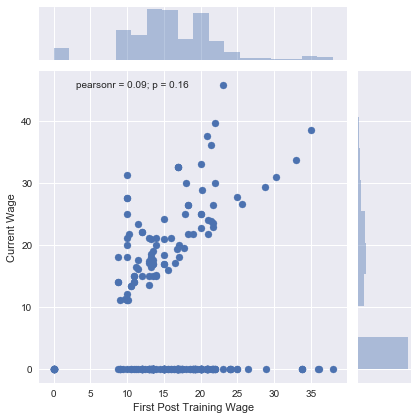

In [25]:
sns.jointplot(x=first_wage, y=current_wage)
plt.show()

There seems to be a good correlation between first post training wage and current wage

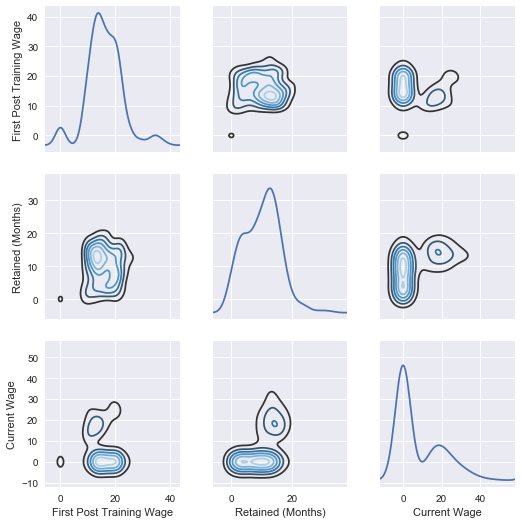

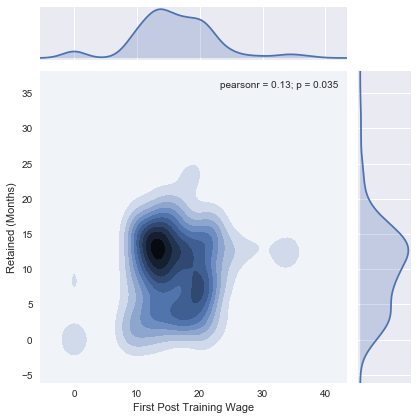

In [27]:
sns.jointplot(x=first_wage, y=retained, kind="kde");
plt.show()

Not much of correlation between first wage and retained duration

Let's go back to initial and current wage and see if we can find a relationship

In [29]:
x = first_wage
y = current_wage

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
lr = linear_model.LinearRegression()

In [41]:
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1, 1), y_train.reshape(-1, 1), y_test.reshape(-1, 1)

/home/kt12/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [42]:
y_train.shape

(197, 1)

In [43]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lr.score(X_test, y_test)

-0.12509452597072479

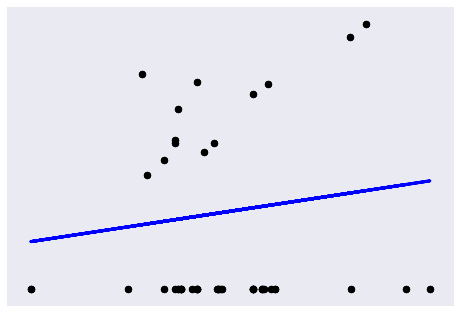

In [46]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, lr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


Not a very good model -- need more samples and features!